In [36]:
import random
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install rpy2==3.4.4

In [2]:
import rpy2

In [4]:
from rpy2 import robjects
from rpy2.robjects import Formula

In [5]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr("base")
stats = importr("stats")
DESeq2 = importr("DESeq2")

C:\Users\lenovo\Anaconda3\lib\site-packages\rpy2\robjects\vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


## Problem 2 (paired)

In [6]:
counts = pd.read_csv("colon_cancer_tumor_vs_normal_paired_counts.tsv", sep="\t", index_col=0)

# Define meta
meta = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5, "Patient": list(range(1, 6))*2}, index=counts.columns)
#meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")

# Calculate normalization factors
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~ Patient + Tissue"))
dds = DESeq2.DESeq(dds)

C:\Users\lenovo\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:62: UserWarning: Error while trying to convert the column "Tissue". Fall back to string conversion. The error is: module 'pandas' has no attribute 'NA'
  % (name, str(e)))
R[write to console]:   the design formula contains one or more numeric variables with integer values,
  specifying a model with increasing fold change for higher values.
  did you mean for this to be a factor? if so, first convert
  this variable to a factor using the factor() function

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [7]:
res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [8]:
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]

In [13]:
print(len(res))
print(res.iloc[:10].index)
res.to_csv("DESeq2_results_paired.tsv", sep="\t")
res_10 = res.head(10)

4965
Index(['RP11-474D1.3', 'CDH3', 'MMP11', 'WNT2', 'ATG9B', 'CEMIP', 'SPTBN2',
       'GYLTL1B', 'C2CD4A', 'TRIB3'],
      dtype='object')


## unpaired

In [10]:
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~ Tissue"))
dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [11]:
res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [16]:
print(len(res))
print(res.iloc[:10].index)
res.to_csv("DESeq2_results_unpaired.tsv", sep="\t")
res1_10 = res.head(10)

4965
Index(['RP11-474D1.3', 'CDH3', 'MMP11', 'WNT2', 'ATG9B', 'CEMIP', 'SPTBN2',
       'GYLTL1B', 'C2CD4A', 'TRIB3'],
      dtype='object')


In [17]:
same_genes = list(set(res_10.index.values) & set(res1_10.index.values))
print(same_genes)
print(len(same_genes))

['TRIB3', 'ATG9B', 'C2CD4A', 'CDH3', 'RP11-474D1.3', 'CEMIP', 'SPTBN2', 'MMP11', 'GYLTL1B', 'WNT2']
10


## Problem 3

In [21]:
df = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv", sep="\t", index_col=0)

In [24]:
df["ttest"] = [ttest_ind(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]
df = df.sort_values("ttest")
print(df.iloc[:10].index)

Index(['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4',
       'ACADSB', 'MT1F', 'PIGN'],
      dtype='object')


In [25]:
df["mannwhitneyu"] = [mannwhitneyu(df.loc[gene].iloc[0:5], df.loc[gene].iloc[5:10])[1] for gene in df.index]
df = df.sort_values("mannwhitneyu")
print(df.iloc[:10].index)

Index(['SFTA2', 'CTD-2147F2.1', 'RAET1L', 'LINC00460', 'AC007128.1',
       'RP5-884M6.1', 'CST1', 'VAC14-AS1', 'LINC00858', 'RP11-399O19.9'],
      dtype='object')


In [27]:
counts = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_counts.tsv", sep="\t", index_col=0)
meta = pd.DataFrame({"Tissue": ["Tumor"]*5 + ["Normal"]*5}, index=counts.columns)
meta["Tissue"] = stats.relevel(robjects.vectors.FactorVector(meta["Tissue"]), ref="Normal")
dds = DESeq2.DESeqDataSetFromMatrix(countData=counts, colData=meta, design=Formula("~ Tissue"))
dds = DESeq2.DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



In [28]:
res = DESeq2.results(dds, name="Tissue_Tumor_vs_Normal")
res = DESeq2.lfcShrink(dds, coef="Tissue_Tumor_vs_Normal", type="apeglm")
res = pd.DataFrame(base.as_data_frame(res))
res.index = counts.index
res = res.sort_values("padj")
res = res.loc[res["padj"] < 0.05]

R[write to console]: using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [29]:
print(res.iloc[:10].index)

Index(['FABP6', 'ETV4', 'IER5L', 'KRT80', 'FUT1', 'C17orf96', 'CLDN1', 'ATG9B',
       'KIAA1257', 'SLC51B'],
      dtype='object')


In [33]:
ttest = set(['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4',
       'ACADSB', 'MT1F', 'PIGN'])
mannwhitneyu = set(['SFTA2', 'CTD-2147F2.1', 'RAET1L', 'LINC00460', 'AC007128.1',
       'RP5-884M6.1', 'CST1', 'VAC14-AS1', 'LINC00858', 'RP11-399O19.9'])
deseq2 = set(['FABP6', 'ETV4', 'IER5L', 'KRT80', 'FUT1', 'C17orf96', 'CLDN1', 'ATG9B',
       'KIAA1257', 'SLC51B'])

In [35]:
print(deseq2.intersection(ttest)) ##deseq2 and ttest
print(deseq2.intersection(mannwhitneyu)) ##deseq2 and mann
print(ttest.intersection(mannwhitneyu)) ##ttest and mann

{'FUT1', 'C17orf96', 'IER5L'}
set()
set()


## Problem 4

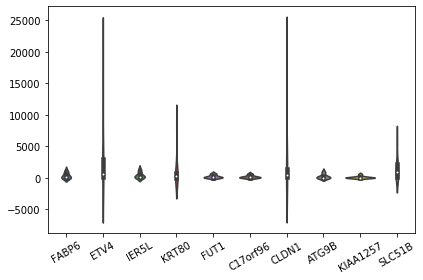

In [40]:
counts = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_counts.tsv", sep="\t", index_col=0)
deseq2=counts.loc[['FABP6', 'ETV4', 'IER5L', 'KRT80', 'FUT1', 'C17orf96', 'CLDN1', 'ATG9B', 'KIAA1257', 'SLC51B']].T
sns.violinplot(data=deseq2)
plt.xticks(rotation=30)
plt.tight_layout()

In [41]:
fpkm = pd.read_csv("colon_cancer_tumor_vs_normal_unpaired_FPKM.tsv", sep="\t", index_col=0)

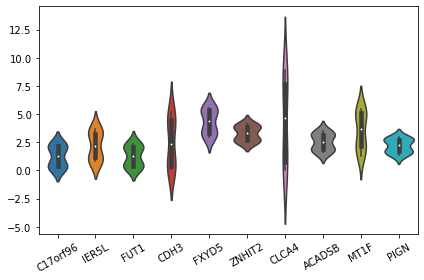

In [42]:
ttest=fpkm.loc[['C17orf96', 'IER5L', 'FUT1', 'CDH3', 'FXYD5', 'ZNHIT2', 'CLCA4', 'ACADSB', 'MT1F', 'PIGN']].T
sns.violinplot(data=ttest)
plt.xticks(rotation=30)
plt.tight_layout()

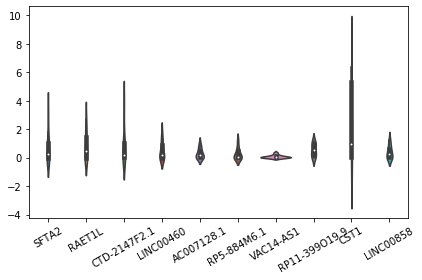

In [43]:
mannwhitneyu=fpkm.loc[['SFTA2', 'RAET1L', 'CTD-2147F2.1', 'LINC00460', 'AC007128.1', 'RP5-884M6.1', 'VAC14-AS1', 'RP11-399O19.9', 'CST1', 'LINC00858']].T
sns.violinplot(data=mannwhitneyu)
plt.xticks(rotation=30)
plt.tight_layout()

## Problem 5

In [46]:
with open('all_genes.txt', 'r') as file:
    file = file.read().splitlines()
    genes = random.sample(file, 1000)

In [47]:
print(genes)
genes5 = open('genes5.txt', 'w')
for gene in genes:
    genes5.write(gene + '\n')
genes5.close()

['KLHL41', 'IGHD2-15', 'KNOP1', 'RP13-34L8.8', 'CTD-2278I10.4', 'PTK7', 'SPTLC1P5', 'MAP2K4', 'RP11-145E17.2', 'CTD-2254N19.1', 'TCEAL7', 'EXOC3', 'RP11-354H21.2', 'SLC46A2', 'RP11-317N8.4', 'NUTF2P5', 'IGSF23', 'KLF2P2', 'AC109351.1', 'FBXO25', 'AC092662.6', 'RP11-357N13.2', 'PIWIL3', 'RN7SL267P', 'RP11-420K14.2', 'OR2J2', 'RP11-124D2.7', 'AP002498.1', 'CICP14', 'GALK2', 'RP11-308D16.1', 'KCNA2', 'DAZ4', 'SPOCD1', 'SAA1', 'GNG4', 'ZNF260', 'RP11-227P3.1', 'PRRG4', 'HSD3B2', 'RP11-502M1.2', 'TGM3', 'RNU4-25P', 'TRIM53CP', 'RP11-449D8.3', 'LSM2', 'RP11-5K16.3', 'RP11-154F14.3', 'NRROS', 'FAM83A-AS1', 'MAGI2-IT1', 'RP11-491H9.4', 'RP11-1113N2.4', 'RNU6-1024P', 'RP11-568G20.2', 'RP11-38L15.3', 'CTA-992D9.10', 'RP11-60C6.3', 'CLTCL1', 'PRND', 'RPL15P3', 'AC068580.1', 'REM2', 'SEMA6A', 'CD99', 'PPIAP31', 'RNU6-749P', 'PPARGC1A', 'SMARCA5', 'RP11-16N2.1', 'SFXN3', 'ASIC1', 'RP11-367G18.1', 'RNU4ATAC16P', 'CTD-2530H12.7', 'RP11-568J23.8', 'RP4-737E23.5', 'LIN28AP1', 'SNORA80A', 'SNF8', 'RP11-